In [ ]:
!pip install tensorflow matplotlib scikit-learn


lab 3

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.1557 - loss: 22.8541 - val_accuracy: 0.1655 - val_loss: 5.3854
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 595ms/step - accuracy: 0.1797 - loss: 5.9087 - val_accuracy: 0.1007 - val_loss: 3.9763
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 636ms/step - accuracy: 0.2091 - loss: 3.4144 - val_accuracy: 0.2806 - val_loss: 2.8925
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 607ms/step - accuracy: 0.2918 - loss: 2.4699 - val_accuracy: 0.1583 - val_loss: 3.6967
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 20s 592ms/step - accuracy: 0.3447 - loss: 2.3058 - val_accuracy: 0.2590 - val_loss: 2.9004
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 708ms/step - accuracy: 0.4615 - loss: 1.6766 - val_accuracy: 0.3094 - val_loss: 2.6841
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 18s 587ms/step - accuracy: 0.4398 - loss: 1.7771 - val_accuracy: 0.3597 - val_loss: 2.0608
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 21s 628ms/step - accuracy: 0.5232 - loss: 1.3597 - val_accura

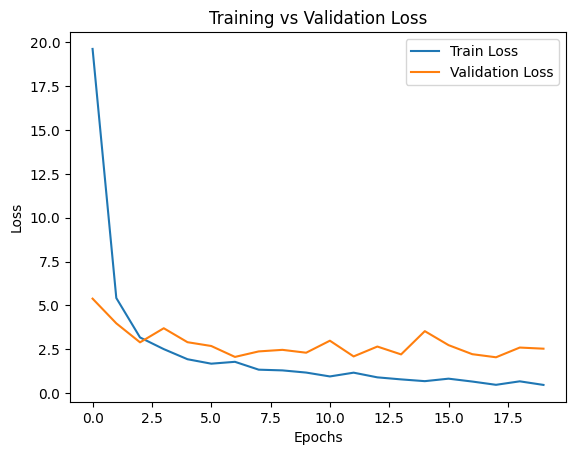

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3540 - loss: 2.6241
Test Accuracy: 0.3381


In [ ]:
#Lab 3

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set dataset path
dataset_path = "/content/drive/MyDrive/NNDL Dataset/Dataset"

# Categories (folders)
categories = ["gond painting", "kalighat painting", "kangra painting", "kerala mural",
              "madhubani painting", "mandana art drawing", "pichwai painting", "warli painting"]

# Image loading settings
img_size = (128, 128)
valid_extensions = (".jpg", ".jpeg", ".png")  # Only allow valid image files

# Load images and labels
data, labels = [], []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith(valid_extensions):  # Check if the file is an image
            img_path = os.path.join(folder_path, img_name)
            try:
                img = load_img(img_path, target_size=img_size)  # Load and resize
                img_array = img_to_array(img) / 255.0  # Normalize (0 to 1)
                data.append(img_array)
                labels.append(category)
            except Exception as e:
                print(f"Skipping file {img_name}: {e}")

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels)

# Train-validation-test split (70-15-15)
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build MLP model
model = Sequential([
    Flatten(input_shape=img_size + (3,)),
    Dense(512, activation="relu"),
    Dense(256, activation="relu"),
    Dense(128, activation="relu"),
    Dense(len(categories), activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import UnidentifiedImageError  # Import UnidentifiedImageError to handle errors

# Dataset path
dataset_path = "/content/drive/MyDrive/NNDL Dataset/Dataset"

# Categories (folders)
categories = ["gond painting", "kalighat painting", "kangra painting", "kerala mural",
              "madhubani painting", "mandana art drawing", "pichwai painting", "warli painting"]

# Image loading settings
img_size = (128, 128)
valid_extensions = (".jpg", ".jpeg", ".png")  # Allow only valid image files

# Load images and labels
data, labels = [], []

for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Check if the file has a valid image extension
        if not img_name.lower().endswith(valid_extensions):
            print(f"")
            continue  # Skip non-image files

        try:
            img = load_img(img_path, target_size=img_size)  # Load and resize
            img_array = img_to_array(img) / 255.0  # Normalize
            data.append(img_array)
            labels.append(category)
        except UnidentifiedImageError:
            print(f"")

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels, num_classes=len(categories))

# Split data
train_X, val_X, train_Y, val_Y = train_test_split(data, labels, test_size=0.2, random_state=42)

# Model Architecture
model = Sequential([
    Conv2D(64, (3,3), input_shape=(128, 128, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 63, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,823,176 (56.55 MB)

 Trainable params: 14,822,792 (56.54 MB)

 Non-trainable params: 384 (1.50 KB)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 63, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,823,176 (56.55 MB)

 Trainable params: 14,822,792 (56.54 MB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.2318 - loss: 21.2399 - val_accuracy: 0.0811 - val_loss: 4.4905
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.4806 - loss: 14.1406 - val_accuracy: 0.1189 - val_loss: 14.6535
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5845 - loss: 5.6412 - val_accuracy: 0.1189 - val_loss: 17.8303
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.6442 - loss: 4.0814 - val_accuracy: 0.1189 - val_loss: 17.7769
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 67s 3s/step - accuracy: 0.7365 - loss: 2.1504 - val_accuracy: 0.1243 - val_loss: 23.7953
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.7121 - loss: 1.9937 - val_accuracy: 0.1189 - val_loss: 15.8675
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6984 - loss: 2.3865 - val_accuracy: 0.1730 - val_loss: 10.1813
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.7499 - loss: 1.4636 - val_accuracy: 0.2541 - v

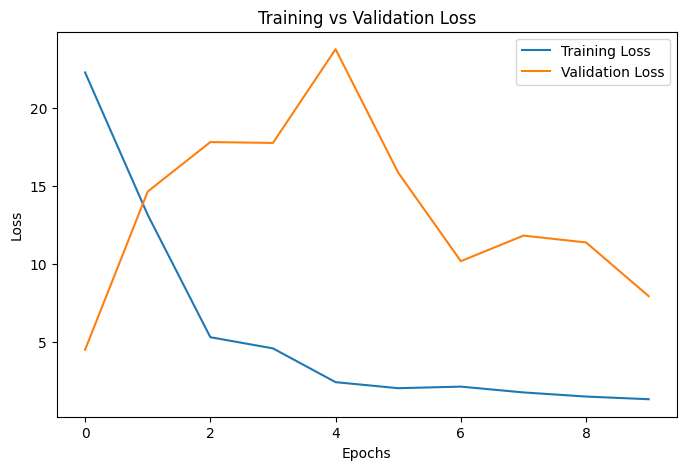

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 814ms/step - accuracy: 0.2894 - loss: 7.9234
Validation Accuracy: 27.57%


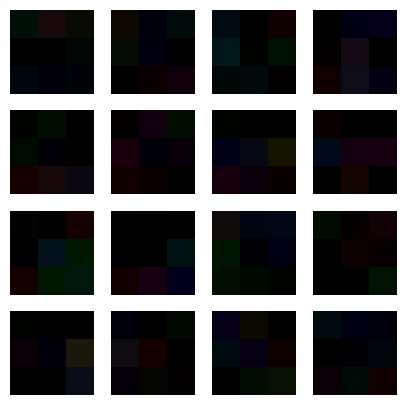

ValueError: operands could not be broadcast together with shapes (128,128,3) (3,3,3) 

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import UnidentifiedImageError

# Dataset path
dataset_path = "/content/drive/MyDrive/NNDL Dataset/Dataset"

# Categories (folders)
categories = ["gond painting", "kalighat painting", "kangra painting", "kerala mural",
              "madhubani painting", "mandana art drawing", "pichwai painting", "warli painting"]

# Image loading settings
img_size = (128, 128)
valid_extensions = (".jpg", ".jpeg", ".png")

data, labels = [], []

# Load images and labels
for category in categories:
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        if not img_name.lower().endswith(valid_extensions):
            continue  # Skip non-image files
        try:
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0  # Normalize
            data.append(img_array)
            labels.append(category)
        except UnidentifiedImageError:
            continue

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)
labels = to_categorical(labels, num_classes=len(categories))

# Split data
train_X, val_X, train_Y, val_Y = train_test_split(data, labels, test_size=0.2, random_state=42)

# A1: Design and train CNN
input_layer = Input(shape=(128, 128, 3))
x = Conv2D(64, (3,3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = BatchNormalization()(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
out_layer = Dense(len(categories), activation='softmax')(x)
model = Model(inputs=input_layer, outputs=out_layer)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# A2: Train the model and plot loss
history = model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=10, batch_size=32)

plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

# A3: Evaluate model accuracy
loss, accuracy = model.evaluate(val_X, val_Y)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

# A4: Inspect filters of first Conv layer
filters, biases = model.layers[1].get_weights()
fig, axes = plt.subplots(4, 4, figsize=(5,5))
for i in range(16):
    axes[i//4, i%4].imshow(filters[:,:,:,i], cmap='gray')
    axes[i//4, i%4].axis('off')
plt.show()

# A5: Apply a filter on an image
sample_img = val_X[0]
filter_ = filters[:,:,:,0]  # Take first filter
filtered_img = np.sum(sample_img * filter_, axis=-1)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(sample_img)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Filtered Image")
plt.imshow(filtered_img, cmap='gray')
plt.axis("off")
plt.show()

# A6: Fully connected dense network
fc_model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(len(categories), activation='softmax')
])

fc_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
fc_model.fit(train_X, train_Y, validation_data=(val_X, val_Y), epochs=10, batch_size=32)
fc_model.summary()


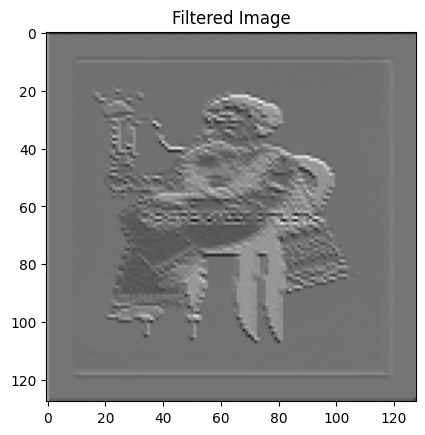

In [ ]:
import tensorflow as tf

# Expand dimensions of the sample image to match input shape for convolution
sample_img_expanded = np.expand_dims(sample_img, axis=0)  # Shape: (1, 128, 128, 3)

# Convert filter to a TensorFlow tensor and reshape it for convolution
filter_reshaped = np.expand_dims(filters[:, :, :, 0], axis=-1)  # Shape: (3, 3, 3, 1)

# Apply 2D convolution
filtered_img = tf.nn.conv2d(sample_img_expanded, filter_reshaped, strides=1, padding="SAME")

# Remove batch dimension and visualize
filtered_img = tf.squeeze(filtered_img).numpy()  # Converts to (128, 128)
plt.imshow(filtered_img, cmap='gray')  # No need to index [:,:,0]
plt.title("Filtered Image")
plt.show()


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')